In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop ('waterfront', axis = 1, inplace = True)

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
from datetime import date
current_year = date.today().year
df['age'] = current_year - df['yr_built']
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,3,...,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509,15
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,3,...,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200,10
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,3,...,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007,15
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,3,...,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287,20


In [ ]:
df.drop(['date'], axis = 1, inplace = True)

In [ ]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509,15
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200,10
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007,15
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287,20


In [ ]:
def plot_zero_precentage(label):
  zeros = (df[label] == 0).sum()
  nums = (df[label] != 0).sum()
  print(f'Zeros: {zeros}, Non-zeros: {nums}')
  labels = ['Zeros', 'Non-zeros']
  sizes = [zeros, nums]
  colors = ['skyblue', 'lightgreen']
  explode = (0.1, 0)
  plt.figure(figsize=(2, 2))
  plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  plt.title('Distribution of Zeros and Non-zeros in Capital Gain')
  plt.axis('equal')

  plt.tight_layout()
  plt.show()

Zeros: 19489, Non-zeros: 2124


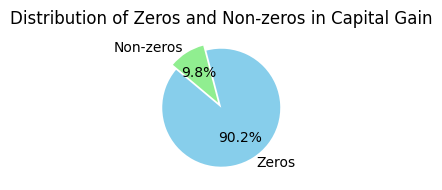

In [ ]:
plot_zero_precentage('view')

Zeros: 20699, Non-zeros: 914


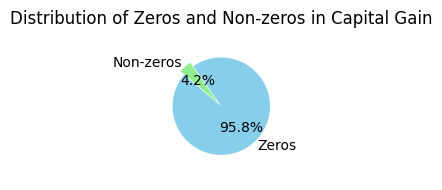

In [ ]:
plot_zero_precentage('yr_renovated')

Zeros: 13126, Non-zeros: 8487


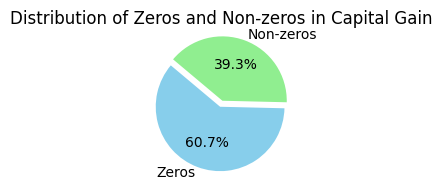

In [ ]:
plot_zero_precentage('sqft_basement')

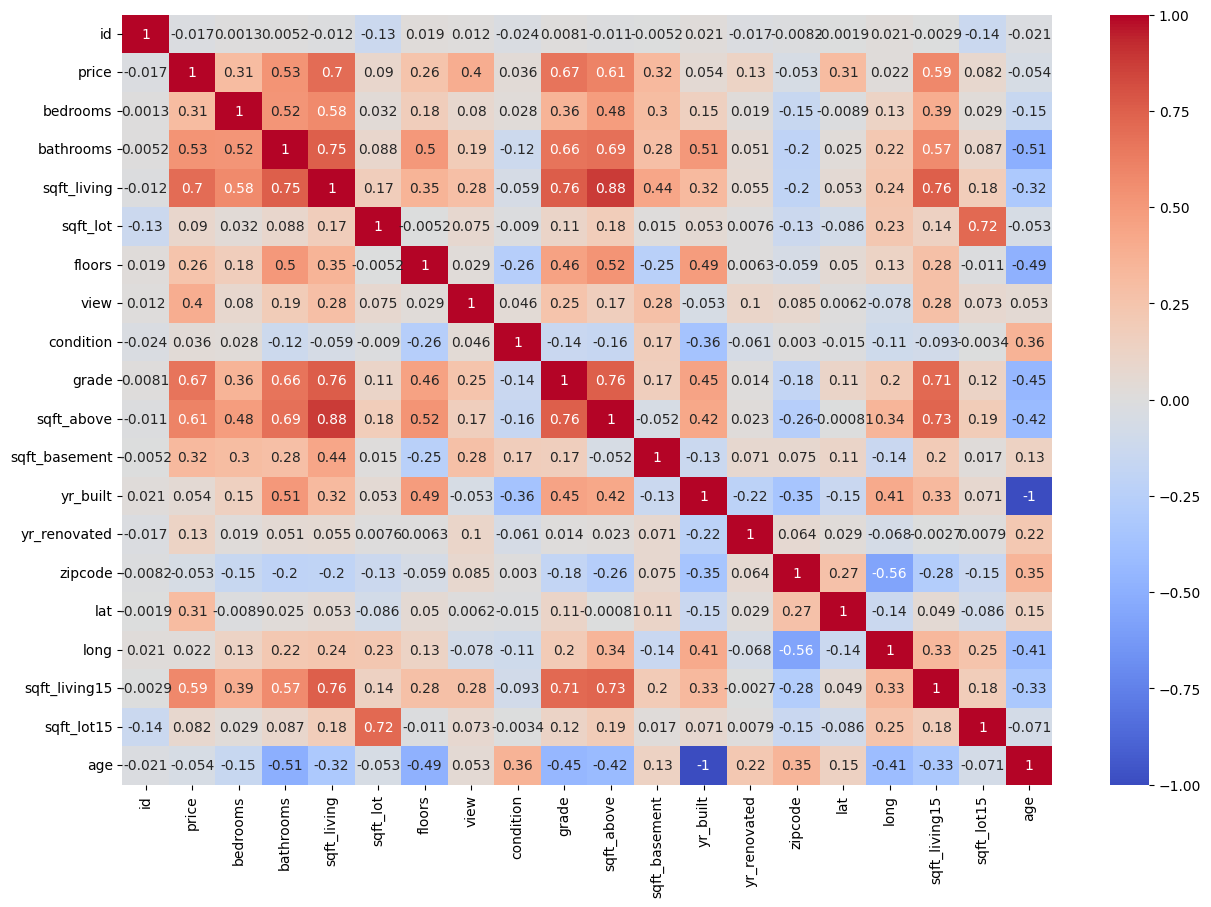

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df.drop(['sqft_lot'], axis = 1, inplace = True)
df.drop(['yr_renovated'], axis = 1, inplace = True)

In [ ]:
df.drop(['yr_built'], axis = 1, inplace = True)
df.drop(['zipcode'], axis = 1, inplace = True)
df.drop(['age'], axis = 1, inplace = True)
df.drop(['sqft_lot15'], axis = 1, inplace = True)
df.drop(['floors'], axis = 1, inplace = True)


In [ ]:
df.drop(['condition'], axis = 1, inplace = True)

In [ ]:
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15
0,221900.0,3,1.00,1180,0,7.0,1180.0,0.0,47.5112,-122.257,1340.0
1,538000.0,3,2.25,2570,0,7.0,2170.0,400.0,47.7210,-122.319,1690.0
2,180000.0,2,1.00,770,0,6.0,770.0,0.0,47.7379,-122.233,2720.0
3,604000.0,4,3.00,1960,0,7.0,1050.0,910.0,47.5208,-122.393,1360.0
4,510000.0,3,2.00,1680,0,8.0,1680.0,0.0,47.6168,-122.045,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
19018,225000.0,3,2.00,1100,0,6.0,1100.0,0.0,47.3606,-122.083,1050.0
19019,315000.0,3,2.50,1730,0,7.0,1730.0,0.0,47.3505,-122.032,1780.0
19020,425000.0,3,2.50,1480,0,8.0,1480.0,0.0,47.5468,-121.998,1470.0
19021,346500.0,3,1.00,1150,0,7.0,1150.0,0.0,47.5624,-122.361,1880.0


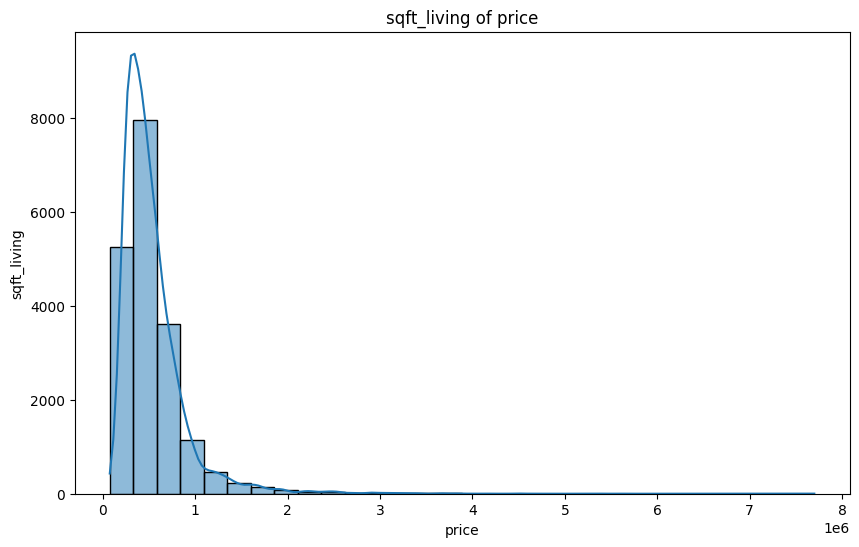

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('sqft_living of price')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)
df = df.loc[filter]

In [ ]:
df['price'] = np.log1p(df['price'])

<ipython-input-27-9fbd8f107ee1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = np.log1p(df['price'])


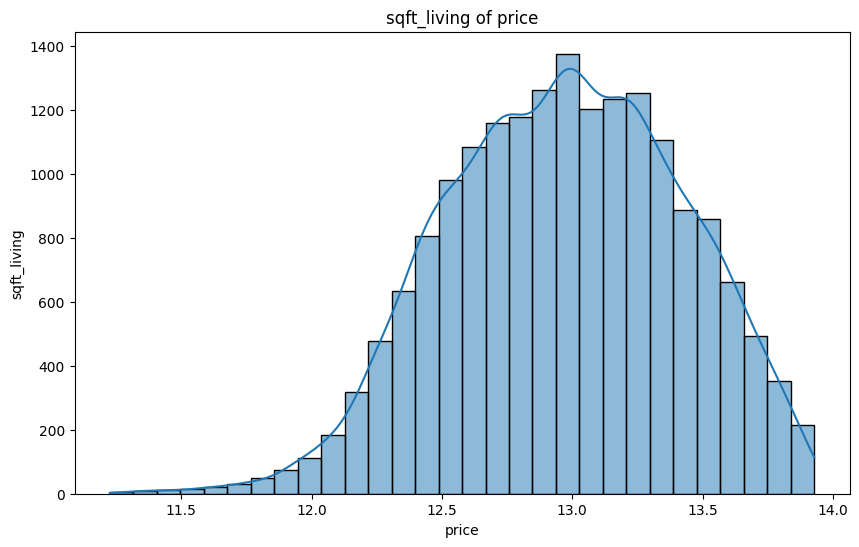

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('sqft_living of price')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.show()

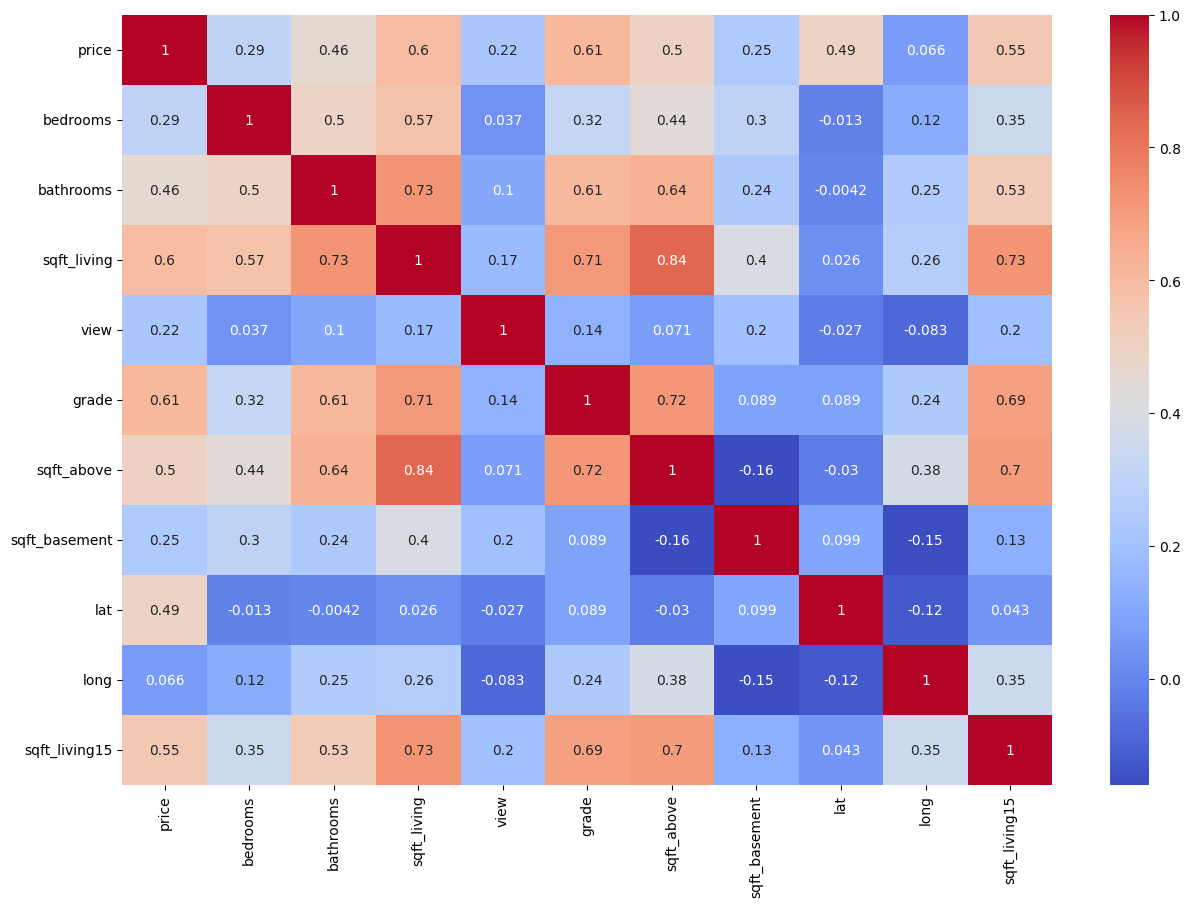

In [ ]:

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


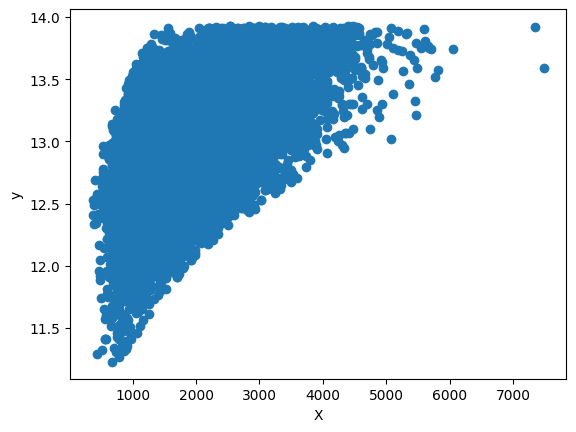

In [ ]:
X = df['sqft_living']
y = df ['price']

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18026 entries, 0 to 19022
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18026 non-null  float64
 1   bedrooms       18026 non-null  int64  
 2   bathrooms      18026 non-null  float64
 3   sqft_living    18026 non-null  int64  
 4   view           18026 non-null  int64  
 5   grade          18025 non-null  float64
 6   sqft_above     18023 non-null  float64
 7   sqft_basement  18025 non-null  float64
 8   lat            18025 non-null  float64
 9   long           18025 non-null  float64
 10  sqft_living15  18025 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.7 MB


In [ ]:
z_scores = np.abs((df - df.mean()) / df.std())

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

print(df[outliers])


           price  bedrooms  bathrooms  sqft_living  view  grade  sqft_above  \
10     13.403777         3       2.50         3560     0    8.0         NaN   
15     13.384729         4       3.00         2950     3    9.0      1980.0   
41     13.560620         4       2.25         4220     0    8.0      2600.0   
58     13.765270         5       3.25         3250     4    8.0      3250.0   
60     13.384729         3       2.25         2150     3    8.0      1590.0   
...          ...       ...        ...          ...   ...    ...         ...   
18958  12.884743         3       2.00         2620     3    7.0      2620.0   
18961  13.228525         3       2.50         2750     0    9.0      2750.0   
18980  13.764218         4       3.25         3820     0   10.0      3820.0   
19002  12.861001         2       1.00          830     3    6.0       830.0   
19010  13.604791         6       2.75         3970     0   10.0      2180.0   

       sqft_basement      lat     long  sqft_living

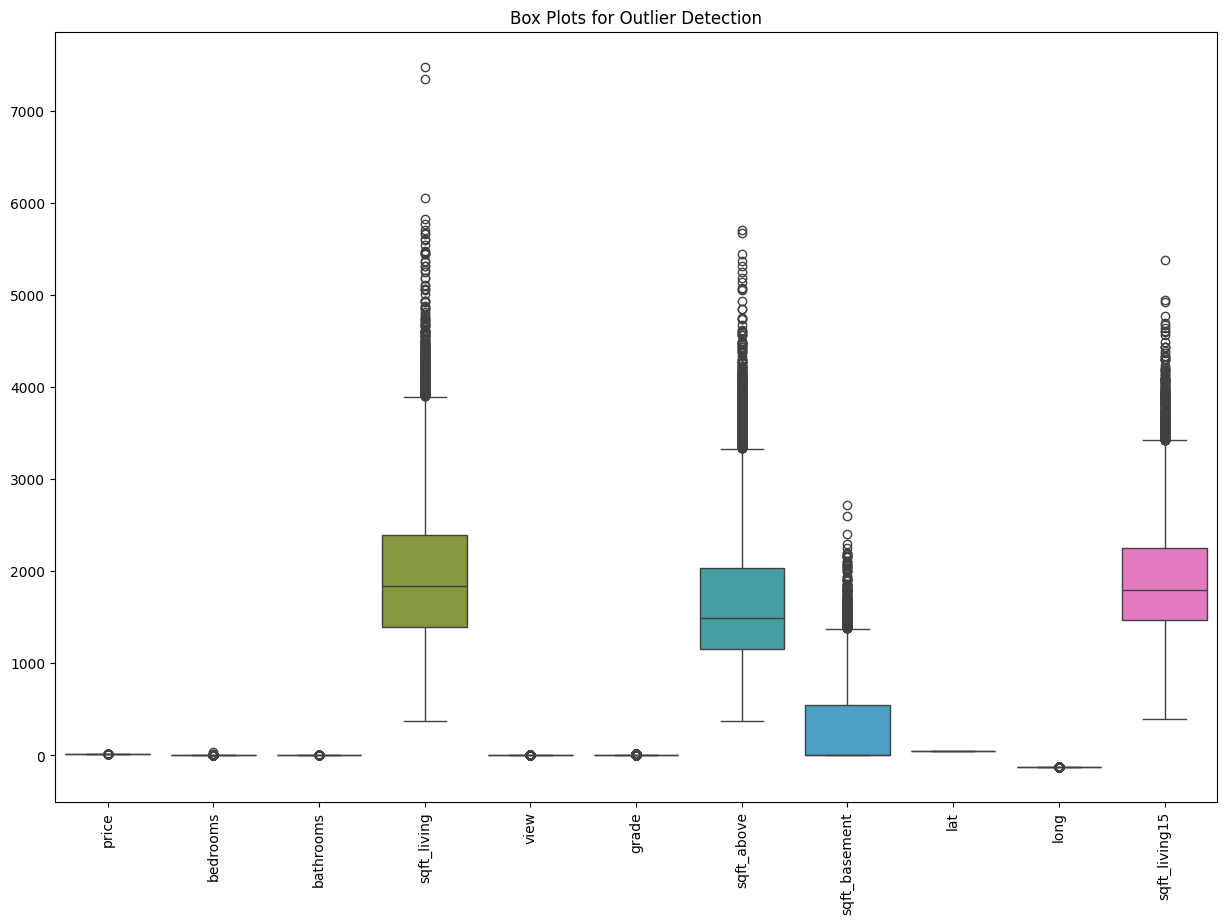

In [ ]:

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Outlier Detection')
plt.show()


In [ ]:
z_scores = np.abs((df['sqft_living'] - df['sqft_living'].mean()) / df['sqft_living'].std())

threshold = 3

outliers = z_scores > threshold

df_no_outliers = df[~outliers]

df_no_outliers = df_no_outliers.reset_index(drop=True)

print(df_no_outliers)

           price  bedrooms  bathrooms  sqft_living  view  grade  sqft_above  \
0      12.309987         3       1.00         1180     0    7.0      1180.0   
1      13.195616         3       2.25         2570     0    7.0      2170.0   
2      12.100718         2       1.00          770     0    6.0       770.0   
3      13.311331         4       3.00         1960     0    7.0      1050.0   
4      13.142168         3       2.00         1680     0    8.0      1680.0   
...          ...       ...        ...          ...   ...    ...         ...   
17877  12.323860         3       2.00         1100     0    6.0      1100.0   
17878  12.660331         3       2.50         1730     0    7.0      1730.0   
17879  12.959847         3       2.50         1480     0    8.0      1480.0   
17880  12.755641         3       1.00         1150     0    7.0      1150.0   
17881  13.217675         3       2.25         1950     0    NaN         NaN   

       sqft_basement      lat     long  sqft_living

In [ ]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['sqft_living'] >= Q1 - 1.5 * IQR) & (df['sqft_living'] <= Q3 + 1.5 * IQR)

df = df.loc[filter]

In [ ]:
Q1 = df['sqft_above'].quantile(0.25)
Q3 = df['sqft_above'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['sqft_above'] >= Q1 - 1.5 * IQR) & (df['sqft_above'] <= Q3 + 1.5 * IQR)

df = df.loc[filter]

In [ ]:
Q1 = df['sqft_basement'].quantile(0.25)
Q3 = df['sqft_basement'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['sqft_basement'] >= Q1 - 1.5 * IQR) & (df['sqft_basement'] <= Q3 + 1.5 * IQR)

df = df.loc[filter]

In [ ]:
Q1 = df['sqft_living15'].quantile(0.25)
Q3 = df['sqft_living15'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['sqft_living15'] >= Q1 - 1.5 * IQR) & (df['sqft_living15'] <= Q3 + 1.5 * IQR)

df = df.loc[filter]

In [ ]:
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

outliers = ((df < outlier_threshold_low) | (df > outlier_threshold_high)).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

data_cleaned = df[~outliers]

X_cleaned = data_cleaned.drop(columns=['price'])
y_cleaned = data_cleaned['price']

scaler = StandardScaler()

X = pd.DataFrame(X)

X_scaled = scaler.fit_transform(X)

X_scaled_cleaned = scaler.fit_transform(X_cleaned)


Number of outliers detected: 2431


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

for feature in df.columns:
  median = df[feature].median()
  df[feature] = np.where((df[feature] < outlier_threshold_low[feature]) |
                                  (df[feature] > outlier_threshold_high[feature]),
                                  median, df[feature])

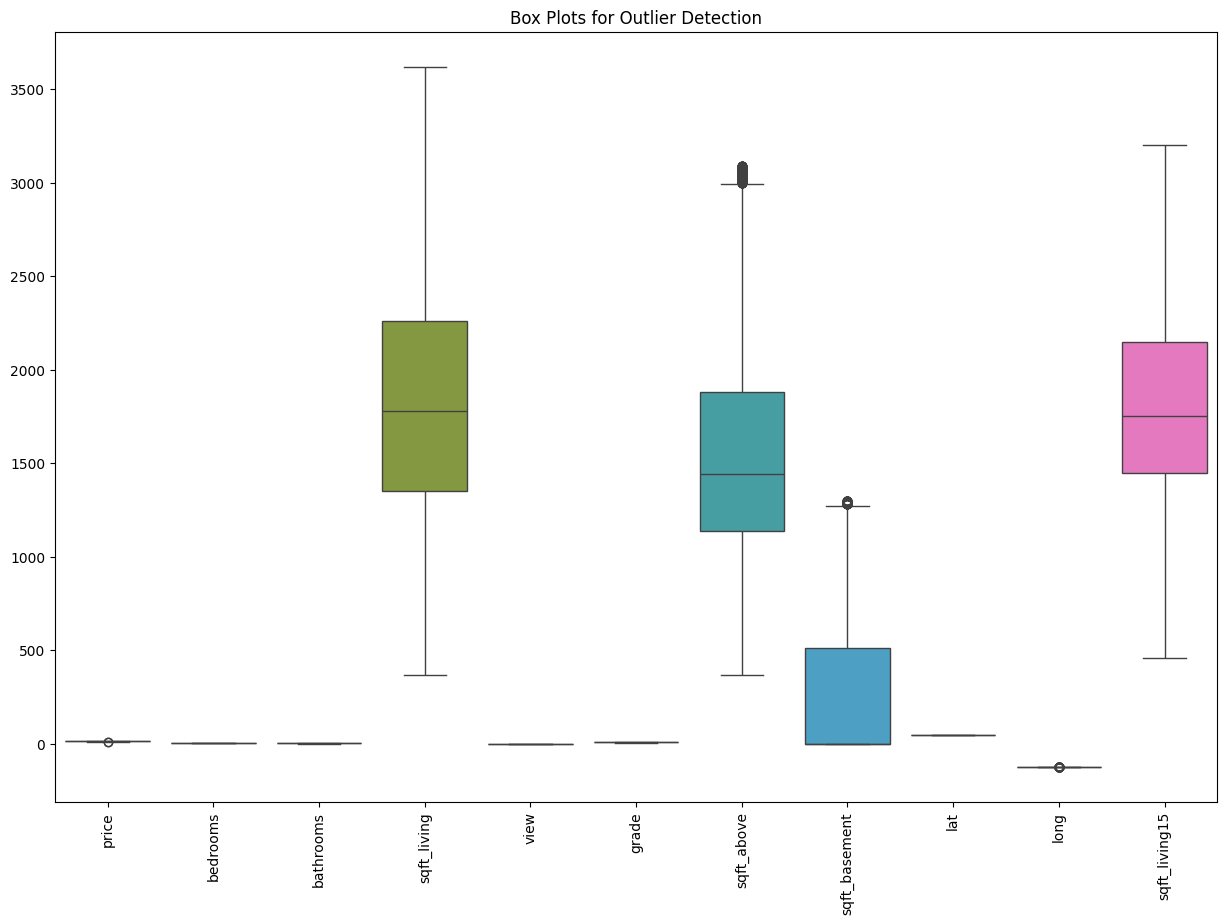

In [ ]:

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Outlier Detection')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [ ]:
y = df['price']
X = df.drop('price', axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MAE: 0.21338921690878793
MSE: 0.07217400899812458
RMSE: 0.2686522082509738
R-squared: 0.6016203258429609


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

y_pred_poly = model_poly.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f'Polynomial MAE: {mae_poly}')
print(f'Polynomial MSE: {mse_poly}')
print(f'Polynomial RMSE: {rmse_poly}')
print(f'Polynomial R-squared: {r2_poly}')


Polynomial MAE: 0.18912498429844468
Polynomial MSE: 0.06000363803799874
Polynomial RMSE: 0.24495640027972068
Polynomial R-squared: 0.6687972567737508
